In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Context: Competitive dataset as of 2018-05-12

In [34]:
pokemon = pd.read_csv('pokemon-data.csv', sep = ';')
move = pd.read_csv('move-data.csv', sep = ',')

In [35]:
pokemon

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
1,Abomasnow-Mega,"['Grass', 'Ice']",['Snow Warning'],NUBL,90,132,105,132,105,30,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
2,Abra,['Psychic'],"['Inner Focus', 'Magic Guard', 'Synchronize']",LC,25,20,15,105,55,90,['Kadabra'],"['Teleport', 'Ally Switch', 'Barrier', 'Encore..."
3,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."
4,Absol-Mega,['Dark'],['Magic Bounce'],RUBL,65,150,60,115,60,115,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."
5,Accelgor,['Bug'],"['Hydration', 'Sticky Hold', 'Unburden']",NU,80,70,40,100,60,145,[],"['Water Shuriken', 'Final Gambit', 'Power Swap..."
6,Aegislash,"['Steel', 'Ghost']",['Stance Change'],Uber,60,50,150,50,150,60,[],"['Fury Cutter', 'Pursuit', 'Autotomize', 'Shad..."
7,Aegislash-Blade,"['Steel', 'Ghost']",['Stance Change'],Uber,60,150,50,150,50,60,[],"['Fury Cutter', 'Pursuit', 'Autotomize', 'Shad..."
8,Aerodactyl,"['Rock', 'Flying']","['Pressure', 'Rock Head', 'Unnerve']",RU,80,105,65,60,75,130,[],"['Iron Head', 'Ice Fang', 'Fire Fang', 'Thunde..."
9,Aerodactyl-Mega,"['Rock', 'Flying']",['Tough Claws'],UU,80,135,85,70,95,150,[],"['Iron Head', 'Ice Fang', 'Fire Fang', 'Thunde..."


In [36]:
split_type = pokemon.Types.str.strip('[]').str.replace("'", '').str.split(', ', expand = True)
pokemon['Type 1'] = split_type[0]
pokemon['Type 2'] = split_type[1]

In [37]:
split_ability = pokemon.Abilities.str.strip('[]').str.replace("'", '').str.split(', ', expand = True)
pokemon['Ability 1'] = split_ability[0]
pokemon['Ability 2'] = split_ability[1]
pokemon['Ability 3'] = split_ability[2]

In [38]:
#unneccesary
clean_pokemon = pokemon.drop(columns = ['Types', 'Abilities', 'Next Evolution(s)']);

In [39]:
pokemon

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves,Type 1,Type 2,Ability 1,Ability 2,Ability 3
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le...",Grass,Ice,Snow Warning,Soundproof,None
1,Abomasnow-Mega,"['Grass', 'Ice']",['Snow Warning'],NUBL,90,132,105,132,105,30,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le...",Grass,Ice,Snow Warning,None,None
2,Abra,['Psychic'],"['Inner Focus', 'Magic Guard', 'Synchronize']",LC,25,20,15,105,55,90,['Kadabra'],"['Teleport', 'Ally Switch', 'Barrier', 'Encore...",Psychic,None,Inner Focus,Magic Guard,Synchronize
3,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,[],"['Perish Song', 'Future Sight', 'Me First', 'R...",Dark,None,Justified,Pressure,Super Luck
4,Absol-Mega,['Dark'],['Magic Bounce'],RUBL,65,150,60,115,60,115,[],"['Perish Song', 'Future Sight', 'Me First', 'R...",Dark,None,Magic Bounce,None,None
5,Accelgor,['Bug'],"['Hydration', 'Sticky Hold', 'Unburden']",NU,80,70,40,100,60,145,[],"['Water Shuriken', 'Final Gambit', 'Power Swap...",Bug,None,Hydration,Sticky Hold,Unburden
6,Aegislash,"['Steel', 'Ghost']",['Stance Change'],Uber,60,50,150,50,150,60,[],"['Fury Cutter', 'Pursuit', 'Autotomize', 'Shad...",Steel,Ghost,Stance Change,None,None
7,Aegislash-Blade,"['Steel', 'Ghost']",['Stance Change'],Uber,60,150,50,150,50,60,[],"['Fury Cutter', 'Pursuit', 'Autotomize', 'Shad...",Steel,Ghost,Stance Change,None,None
8,Aerodactyl,"['Rock', 'Flying']","['Pressure', 'Rock Head', 'Unnerve']",RU,80,105,65,60,75,130,[],"['Iron Head', 'Ice Fang', 'Fire Fang', 'Thunde...",Rock,Flying,Pressure,Rock Head,Unnerve
9,Aerodactyl-Mega,"['Rock', 'Flying']",['Tough Claws'],UU,80,135,85,70,95,150,[],"['Iron Head', 'Ice Fang', 'Fire Fang', 'Thunde...",Rock,Flying,Tough Claws,None,None


In [42]:
clean_pokemon;

In [8]:
pokemon[pokemon['Tier'] == 'Limbo']

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
248,Floette-Eternal,['Fairy'],"['Flower Veil', 'Symbiosis']",Limbo,74,65,67,125,128,92,[],"['Tackle', 'Vine Whip', 'Fairy Wind', 'Fairy W..."
909,Zeraora,['Electric'],['Volt Absorb'],Limbo,88,112,75,102,80,143,[],"['Scratch', 'Spark', 'Hone Claws', 'Quick Atta..."


In [9]:
move;

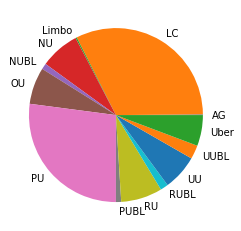

In [10]:
tier_count = pokemon.groupby('Tier').count()['Name']
plt.pie(tier_count, labels = tier_count.index);

This kind of pie chart suggests that most variety in sets and builds comes from LC and PU.

<BarContainer object of 34 artists>

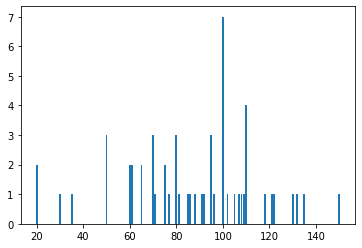

In [11]:
ou_speedtier = pokemon.groupby(['Tier', 'Speed']).count()['Name']['OU']
plt.bar(ou_speedtier.index, ou_speedtier)

Most OU pokemon are alone in the speed tier with a few the most around 100 and 110